# 7CCMFM18 Machine Learning
King's College London <br>
Academic year 2022-2023 <br>
Lecturer: Mario Martone

## Example: Regression
First version: <i>24th February 2020</i> This version <i>2nd February 2021<i>

##### In a good coding etiquette we import all the necessary libraries and functions in the first cell, as shown in the cell below.

This first cell is currently commented out and inactive. For the purpose of this lecture we will conduct bad coding manners, and import the packages directly when they are used, in order to highlight what operations we need the packages for. Note that in larger notebooks, this could result in lengthy and tedious searches for the necessary packages. In order to have everything in one place it is better to import everything in the first cell.

In [3]:
import numpy as np
import numpy.random as npr
import tensorflow.keras as keras
import matplotlib.pyplot as plt

We first define the function $g(x) := \sin(10x)$, $x \in \mathbb{R}$, which we will use to synthetically generate our datapoints.

In [4]:
import numpy as np
def g(x):
    return np.sin(10.*x)

In order to generate slightly "noisy" obervations of the data, we generate the data $x^0,x^1,\ldots,x^{N-1}$ from $\mathrm{Uniform}(0,1)$ and
\begin{equation*}
y^i = g(x^i) + \varepsilon^i, \quad i=0,1\ldots,N-1,
\end{equation*}
with iid $\varepsilon^i \sim N(0,0.01)$, $i = 0,1,\ldots,N-1$, for $N = 10\,100$.

In [5]:
import numpy.random as npr
N = 10100
N_sub = 300
var = 0.01
x = npr.uniform(0,0.75, (N,1))
eps = npr.normal(0, np.sqrt(var), (N,1))
y = g(x)+eps
z = g(x)

Now, if we have the dataset provided in form of a vector y then we can check the size of that dataset by checking the length of that vector. This can be done for example with the following two commands:

In [6]:
np.shape(y)

(10100, 1)

In [7]:
np.size(z)

10100

We plot the first $300$ samples of the generated data. For this we first import the necessary library and set the plotting style.

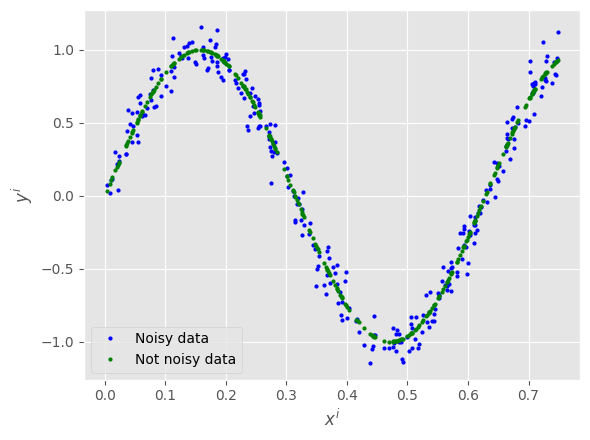

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
N_plot = 300
plt.plot(x[0:N_plot,], y[0:N_plot,], "bo", markersize=2, label = "Noisy data")
plt.plot(x[0:N_plot,], z[0:N_plot,], "go", markersize=2, label = "Not noisy data")
plt.xlabel(r"$x^i$")
plt.ylabel(r"$y^i$")
plt.legend()
plt.show()

Now we specify the neural network $\widehat{g}$ with which we intend to approximate the datapoints plotted above (and ultimately approximate the function $g$)
\begin{equation*}
\widehat{g} \in \mathcal{N}_4(1,50,50,1; \mathrm{ReLU},\mathrm{ReLU},\mathrm{Id})
\end{equation*}
using the Sequential model of Keras, and inspect the specification. The architecture of this neural network is chosen by the modeller. For now, we choose the simple architecture below and see how well it does on the data.

In [10]:
import tensorflow.keras as keras
g_hat = keras.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=(1,)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]
)
g_hat.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


We compile $\widehat{g}$ so that it will be trained using Adam to minimise squared loss.

In [7]:
g_hat.compile(optimizer="adam", loss="mean_squared_error")
g_hat.fit(x, y, batch_size=100, epochs=5,validation_split=0.5)

Epoch 1/5
51/51 [==============================] - 2s 11ms/step - loss: 0.4679 - val_loss: 0.4288
Epoch 2/5
51/51 [==============================] - 0s 3ms/step - loss: 0.4157 - val_loss: 0.3799
Epoch 3/5
51/51 [==============================] - 0s 3ms/step - loss: 0.3697 - val_loss: 0.3484
Epoch 4/5
51/51 [==============================] - 0s 2ms/step - loss: 0.3404 - val_loss: 0.3209
Epoch 5/5
51/51 [==============================] - 0s 6ms/step - loss: 0.3086 - val_loss: 0.2840


32/32 [==============================] - 0s 1ms/step


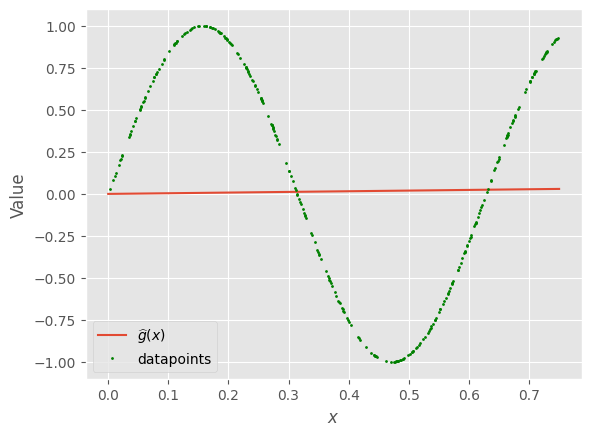

In [11]:
x_grid = np.linspace(0,0.75,num=1001)
y_hat = g_hat.predict(x_grid)
g_grid = g(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{g}(x)$")
plt.plot(x[0:N_sub,], z[0:N_sub,], "go", markersize=1, label="datapoints")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.legend()
plt.show()

Then we can train $\widehat{g}$, with minibatches of size $100$, over $5$ epochs.

In [13]:
g_hat.compile(optimizer="adam", loss="mean_squared_error")
g_hat.fit(x, z, batch_size=100, epochs=6,validation_split=0.5)

Epoch 1/6
51/51 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 2/6
51/51 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/6
51/51 [==============================] - 0s 3ms/step - loss: 8.9164e-04 - val_loss: 7.6701e-04
Epoch 4/6
51/51 [==============================] - 0s 3ms/step - loss: 6.1409e-04 - val_loss: 5.0002e-04
Epoch 5/6
51/51 [==============================] - 0s 3ms/step - loss: 3.9403e-04 - val_loss: 3.5327e-04
Epoch 6/6
51/51 [==============================] - 0s 3ms/step - loss: 2.6777e-04 - val_loss: 2.4440e-04


Once training has finished, we compare $g$ with the trained $\widehat{g}$.

32/32 [==============================] - 0s 1ms/step


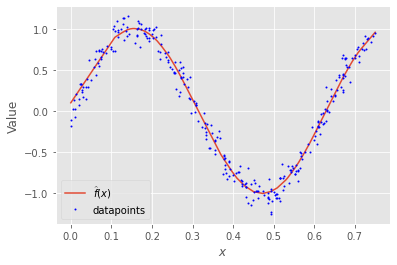

In [18]:
x_grid = np.linspace(0,0.75,num=1001)
y_hat = g_hat.predict(x_grid)
f_grid = g(x_grid)
plt.plot(x_grid, y_hat, label=r"$\widehat{f}(x)$")
plt.plot(x[0:N_sub,], y[0:N_sub,], "bo", markersize=1, label="datapoints")
plt.xlabel("$x$")
plt.ylabel("Value")
plt.legend()
plt.show()

Now, to demonstrate the potential problem of <b>overfitting</b>,  we are going to use only the first $200$ samples.

In fact, we split these $200$ samples into a <b>training</b> set of $100$ samples and <b>validation set</b> of $100$ samples.

In [15]:
N_small = 200
x_small = x[0:N_small]
y_small = y[0:N_small]

In [19]:
g_hat_over = keras.Sequential([
    keras.layers.Dense(1000, activation="elu", input_shape=(1,)),
    keras.layers.Dense(1000, activation="elu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1, activation="linear")
]
)
g_hat_over.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              2000      
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_10 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 2,005,001
Trainable params: 2,005,001
Non-trainable params: 0
_________________________________________________________________


Train the new network with Adam using full batches over a different number of epochs.

In [20]:
g_hat_over.compile(optimizer="adam", loss="mean_squared_error")
g_hat_over.fit(x_small, y_small, batch_size=100, epochs=500, validation_split=0.5)


Epoch 1/500
1/1 [==============================] - 1s 726ms/step - loss: 0.4495 - val_loss: 0.6859
Epoch 2/500
1/1 [==============================] - 0s 57ms/step - loss: 0.5671 - val_loss: 0.4817
Epoch 3/500
1/1 [==============================] - 0s 44ms/step - loss: 0.4349 - val_loss: 0.4991
Epoch 4/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4713 - val_loss: 0.4787
Epoch 5/500
1/1 [==============================] - 0s 51ms/step - loss: 0.4383 - val_loss: 0.4888
Epoch 6/500
1/1 [==============================] - 0s 53ms/step - loss: 0.4262 - val_loss: 0.5059
Epoch 7/500
1/1 [==============================] - 0s 49ms/step - loss: 0.4336 - val_loss: 0.4785
Epoch 8/500
1/1 [==============================] - 0s 51ms/step - loss: 0.4172 - val_loss: 0.4522
Epoch 9/500
1/1 [==============================] - 0s 48ms/step - loss: 0.4104 - val_loss: 0.4431
Epoch 10/500
1/1 [==============================] - 0s 50ms/step - loss: 0.4114 - val_loss: 0.4287
Epoch 11/500
1/1 [

We note that <b>training loss</b> becomes lower than <b>validation loss</b>, in fact lower than the model error variance 0.1. This is a clear sign of overfitting. Include a visual assessment to confirm that this is indeed true.
Try with different numbers of epochs and try increasing the number of samples and observe the effect.